### Table of contents<a class='anchor' id='top'></a>
- [Importing Packages](#1)
- [Importing Data](#2)
- [Exploratory Data Analysis](#3)

# 1. Importing Packages <a class='anchor' id='1'></a> [↑](#top)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import random
from scipy.stats import shapiro,kstest
from statsmodels.stats.diagnostic import lilliefors
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

# 2. Importing Data <a class='anchor' id='2'></a> [↑](#top)

We are using the "continoous factory process" dataset. You can find the original dataset [here](https://www.kaggle.com/datasets/supergus/multistage-continuousflow-manufacturing-process).

In [4]:
raw_data = pd.read_csv(".\continuous_factory_process.csv")
raw_data.head()


,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


We are only interested in the stage one output values. We select the corresponding columns.

In [10]:
last_col = "Stage1.Output.Measurement14.U.Setpoint"
first_col = "Stage1.Output.Measurement0.U.Actual"
subset_df = raw_data.loc[:,first_col:last_col]
subset_df

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,...,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51,17.72
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,...,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00,17.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14084,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14085,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14086,12.58,13.75,0.0,22.74,8.99,13.02,21.84,21.88,31.55,32.55,...,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00,17.72


# 3. Exploratory Data Analysis <a class='anchor' id='3'></a> [↑](#top)

We are looking for a feature that has:
1. high variance
2. many values (few errorous readings)
3. visually symmetric distribution

In [11]:
def plot_data(data,colname):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    plt.title(colname)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

We iterate over all the columns of the selected dataframe. Note that every uneven indexed column contains setpoint values and no feature. Therefore we skip it in the analysis. 

Stage1.Output.Measurement0.U.Actual has length of: 13992


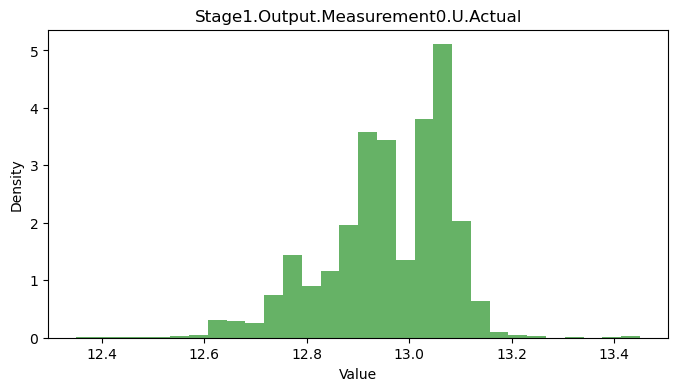

Mean: 12.961320356111427, Standard Deviation: 0.20578806255755808
*********************************************************************
Stage1.Output.Measurement1.U.Actual has length of: 8145


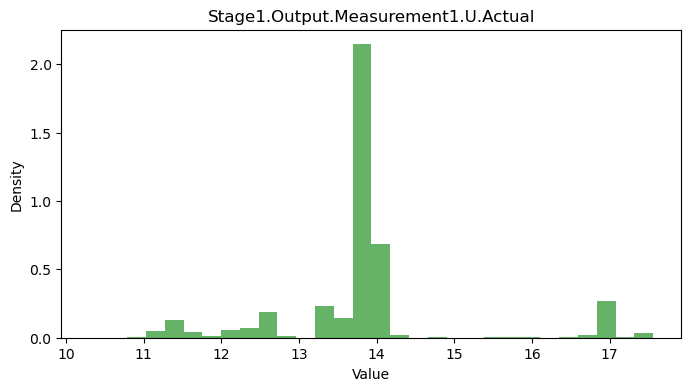

Mean: 13.860288529792253, Standard Deviation: 1.2386269320674488
*********************************************************************
Stage1.Output.Measurement2.U.Actual has length of: 13683


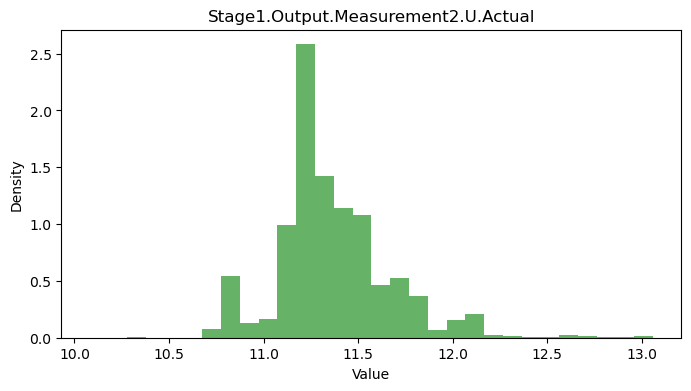

Mean: 11.42726179025425, Standard Deviation: 0.5552061813811813
*********************************************************************
Stage1.Output.Measurement3.U.Actual has length of: 13936


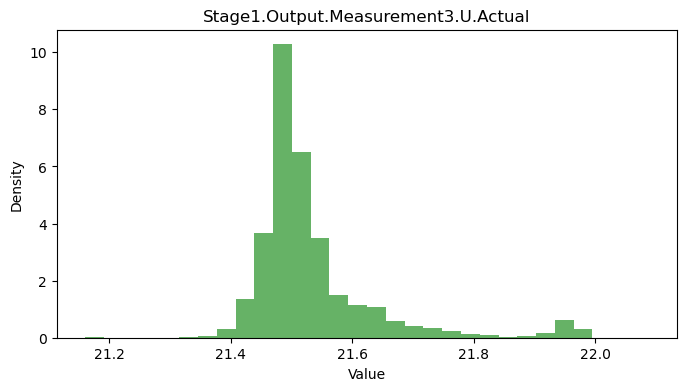

Mean: 21.53228182845825, Standard Deviation: 0.2322184797588809
*********************************************************************
Stage1.Output.Measurement4.U.Actual has length of: 13866


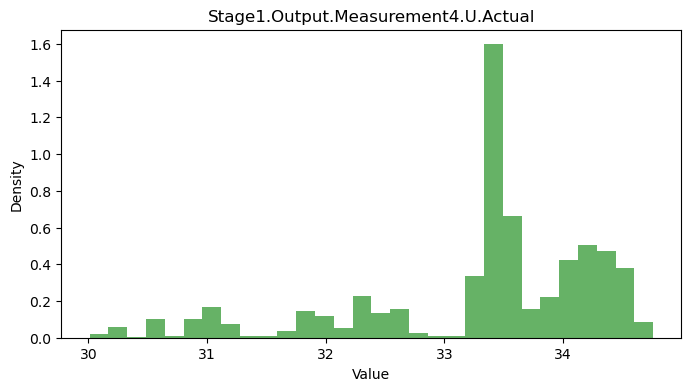

Mean: 33.29345171012493, Standard Deviation: 1.1118684625456932
*********************************************************************
Stage1.Output.Measurement5.U.Actual has length of: 639


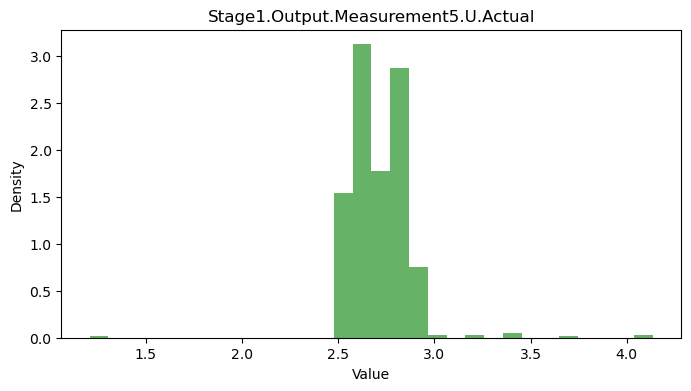

Mean: 2.61869678646263, Standard Deviation: 0.5589233587457205
*********************************************************************
Stage1.Output.Measurement6.U.Actual has length of: 9205


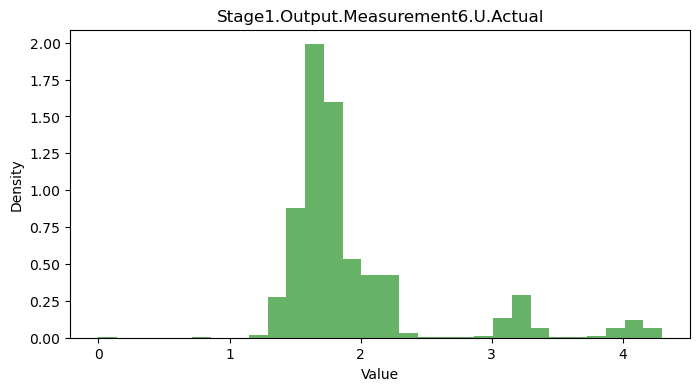

Mean: 2.01090027957207, Standard Deviation: 0.7643165637453848
*********************************************************************
Stage1.Output.Measurement7.U.Actual has length of: 5312


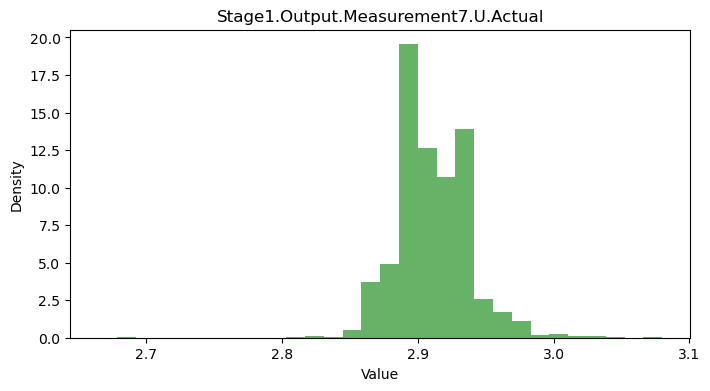

Mean: 2.913887164626762, Standard Deviation: 0.09338092581081735
*********************************************************************
Stage1.Output.Measurement8.U.Actual has length of: 13284


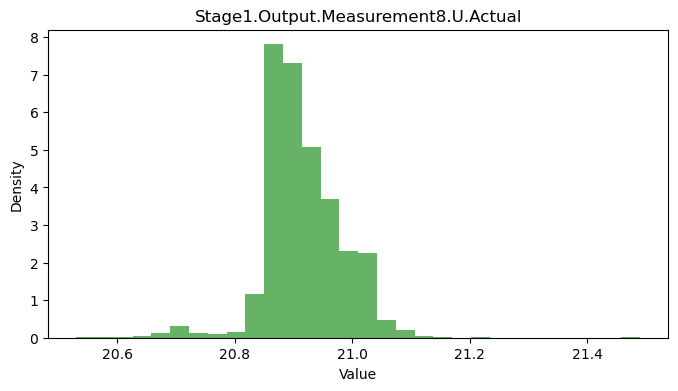

Mean: 20.910256918845654, Standard Deviation: 0.27066687501995895
*********************************************************************
Stage1.Output.Measurement9.U.Actual has length of: 13028


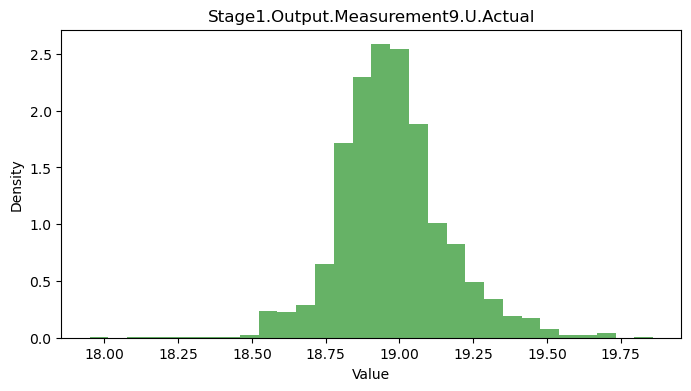

Mean: 18.940695109373788, Standard Deviation: 0.3312371817824751
*********************************************************************
Stage1.Output.Measurement10.U.Actual has length of: 13797


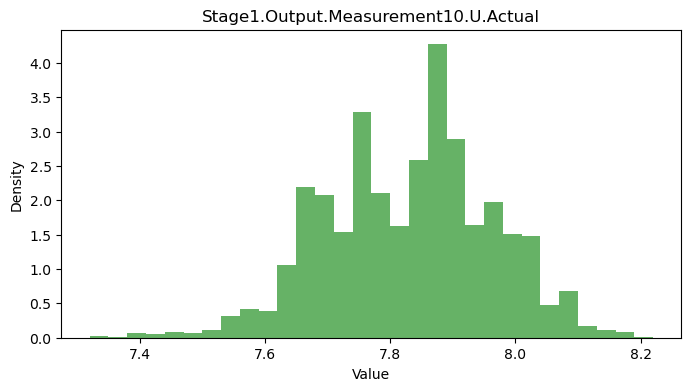

Mean: 7.831358165867284, Standard Deviation: 0.1734257067150523
*********************************************************************
Stage1.Output.Measurement11.U.Actual has length of: 3592


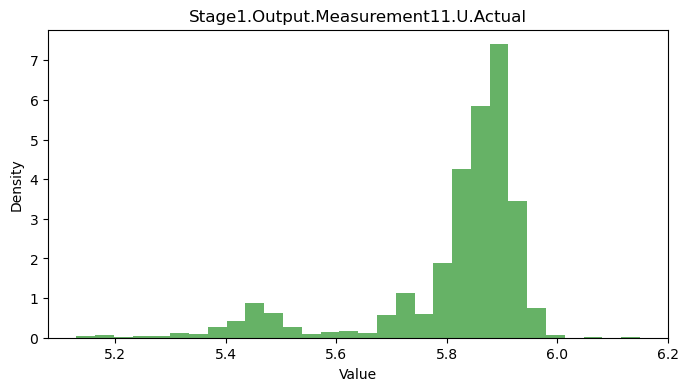

Mean: 5.814152181903236, Standard Deviation: 0.2360656514201106
*********************************************************************
Stage1.Output.Measurement12.U.Actual has length of: 10864


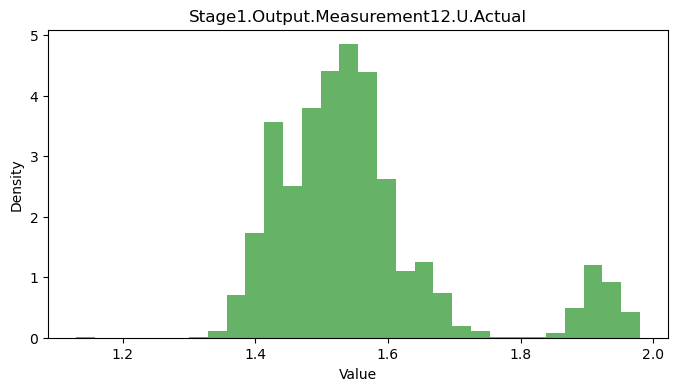

Mean: 1.5556933936411457, Standard Deviation: 0.14405287970000713
*********************************************************************
Stage1.Output.Measurement13.U.Actual has length of: 12902


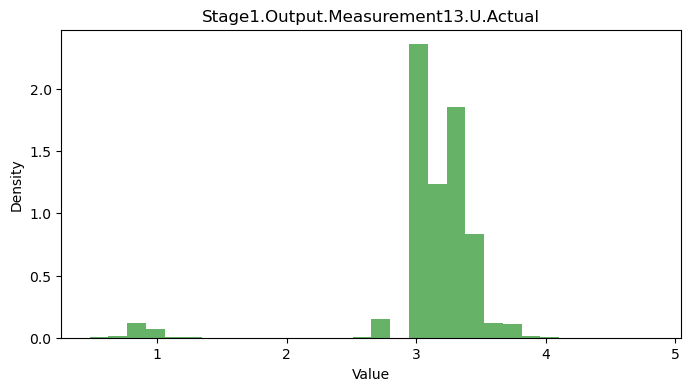

Mean: 2.9531685289125504, Standard Deviation: 0.8334616841536808
*********************************************************************
Stage1.Output.Measurement14.U.Actual has length of: 8951


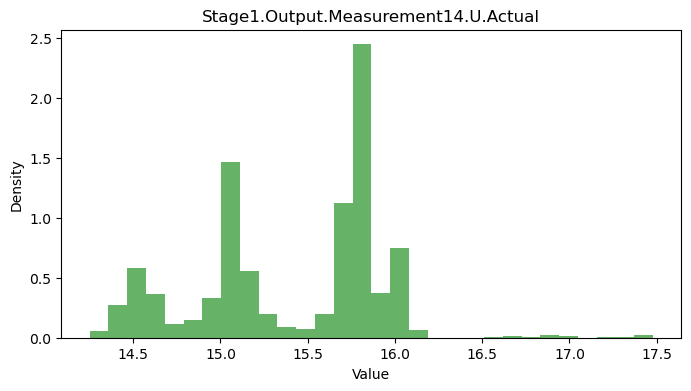

Mean: 15.43960458595959, Standard Deviation: 0.6825142882428149
*********************************************************************


In [20]:
for i,col in enumerate(subset_df.columns):
    #only loo at relevant columns
    if i % 2 == 1:
        continue

    #stat_data becomes the current temporary dataset, since 0 denotes errors, we remove it before calculating the mean and std. 
    stat_data = subset_df.iloc[:,i]
    stat_data = stat_data[(stat_data > 0)]

    mean = stat_data.mean()
    std = stat_data.std()
    
    #further we eliminate runaway values by limiting the range of values to three times the standard deviation of each dataset
    stat_data = stat_data[(stat_data < mean + 3 * std) & (stat_data > mean - 3 * std)]

    stat_data = list(stat_data)
    print(col,"has length of:",len(stat_data))            
    plot_data(stat_data,col)
    print(f"Mean: {mean}, Standard Deviation: {std}")
    
    print("*********************************************************************") 
    

In [9]:
subset_df

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,...,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51,17.72
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,...,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00,17.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14084,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14085,12.61,13.75,0.0,22.74,9.14,13.02,21.50,21.88,31.55,32.55,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14086,12.58,13.75,0.0,22.74,8.99,13.02,21.84,21.88,31.55,32.55,...,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00,17.72


16 Stage1.Output.Measurement9.U.Actual is the chosen Dependent Variable


13028


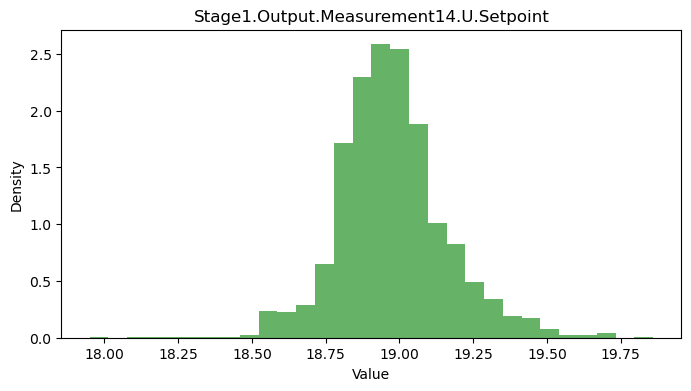

29 Stage1.Output.Measurement14.U.Setpoint 
 13028 
 None 



In [10]:
dataset = subset_df.iloc[:,18]
dataset


stat_data = dataset
stat_data = stat_data[(stat_data > 0)]



mean = stat_data.mean()
std = stat_data.std()

stat_data = stat_data[(stat_data < mean + 3 * std) & (stat_data > mean - 3 * std)]
min = stat_data.min()
max = stat_data.max()
stat_data = list(stat_data)
real_dataset = np.array(stat_data)
print(len(stat_data))

print(i,col,"\n",len(stat_data),"\n",plot_data(stat_data,col),"\n") #kstest(stat_data,'norm'),

In [11]:
mean,std,min,max

(18.940695109373788, 0.3312371817824751, 17.95, 19.86)

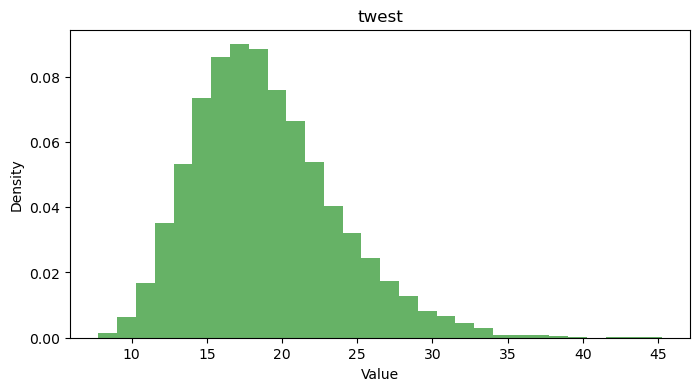

In [12]:

plot_data(np.random.wald(mean,300,len(real_dataset)),"twest")

In [80]:
rng = np.random.default_rng() 
exponential_dataset = np.random.exponential(std,len(real_dataset))
gamma_dataset = np.random.gamma(mean,std,len(real_dataset))
pareto_dataset = np.random.pareto(20,len(real_dataset))
power_dataset = np.random.power(std,len(real_dataset))
gumbel_dataset = np.random.gumbel(mean,std,len(real_dataset))
laplace_dataset = np.random.laplace(mean,std,len(real_dataset))
logistic_dataset = np.random.logistic(mean,std,len(real_dataset))
lognormal_dataset = np.random.lognormal(mean,std,len(real_dataset))

bimodal_lognormal_dataset1 = np.random.lognormal(mean-0.7,std,int(len(real_dataset)/2))
bimodal_lognormal_dataset2 = np.random.lognormal(mean+0.7,std,int(len(real_dataset)/2))
bimodal_lognormal_dataset = np.concatenate([bimodal_lognormal_dataset1,bimodal_lognormal_dataset2])
rng.shuffle(bimodal_lognormal_dataset)

rayleigh_dataset = np.random.rayleigh(std,len(real_dataset))
vonmises_dataset = np.random.vonmises(mean,std,len(real_dataset))
triangular_dataset = np.random.triangular(min,mean,max,len(real_dataset))
uniform_dataset = np.random.uniform(min,max,len(real_dataset))
wald_dataset = np.random.wald(mean,200,len(real_dataset))
weibull_dataset = np.random.weibull(1.5,len(real_dataset))

normal_dataset = np.random.normal(mean,std,len(real_dataset))


bimodal_normal_symmetric_dataset1 = np.random.normal(mean-0.7,std,int(len(real_dataset)/2))
bimodal_normal_symmetric_dataset2 = np.random.normal(mean+0.7,std,int(len(real_dataset)/2))
bimodal_normal_symmetric_dataset = np.concatenate([bimodal_normal_symmetric_dataset1, bimodal_normal_symmetric_dataset2])
rng.shuffle(bimodal_normal_symmetric_dataset)

bimodal_normal_asymmetric_dataset1 = np.random.normal(mean-0.7,std,int(len(real_dataset)/3))
bimodal_normal_asymmetric_dataset2 = np.random.normal(mean+0.7,std, 1+ int(2* (len(real_dataset)/3)))
bimodal_normal_asymmetric_dataset = np.concatenate([bimodal_normal_asymmetric_dataset1, bimodal_normal_asymmetric_dataset2])
rng.shuffle(bimodal_normal_asymmetric_dataset)

datasets = [real_dataset,exponential_dataset,gamma_dataset,pareto_dataset,power_dataset,gumbel_dataset,
            laplace_dataset,logistic_dataset,lognormal_dataset,bimodal_lognormal_dataset,
            rayleigh_dataset,vonmises_dataset,triangular_dataset,uniform_dataset,wald_dataset,
            weibull_dataset,normal_dataset,bimodal_normal_symmetric_dataset,bimodal_normal_asymmetric_dataset,
            ]

In [75]:
datasets

[array([17.95, 17.95, 17.95, ..., 18.95, 18.84, 18.84]),
 array([0.27504334, 0.48290966, 1.06212263, ..., 0.79457216, 0.30115189,
        0.11050418]),
 array([7.1771175 , 8.22506297, 7.65024149, ..., 6.59843597, 9.10883292,
        8.3894972 ]),
 array([0.06409118, 0.0208017 , 0.0103845 , ..., 0.00108169, 0.00088794,
        0.01569737]),
 array([0.00567598, 0.00693354, 0.16062312, ..., 0.19355549, 0.07253181,
        0.02952997]),
 array([19.35722172, 18.98588265, 19.14810767, ..., 19.22935769,
        18.65568045, 18.6742296 ]),
 array([19.08473878, 19.24609865, 19.98415929, ..., 18.66079669,
        18.83958545, 18.49761633]),
 array([18.79441502, 17.95394646, 18.86968971, ..., 18.35487967,
        19.36840488, 18.89564203]),
 array([1.63140167e+08, 1.41146454e+08, 1.18345407e+08, ...,
        1.88483853e+08, 1.48966783e+08, 1.20520958e+08]),
 array([4.54265664e+08, 3.34330261e+08, 8.64470825e+07, ...,
        9.49927333e+07, 1.55572790e+08, 4.76152109e+08]),
 array([0.43904495, 0.

In [69]:
rng = np.random.default_rng()  # default_rng() creates a new Generator instance

# Your array
arr = np.array([1, 2, 3, 4])

# Shuffle the array using the Generator instance
rng.shuffle(arr)

# The array is shuffled in-place
print(arr)

[3 1 2 4]


In [48]:
start_time = datetime(2020, 1, 1, 0, 0)  # Example: January 1, 2020 at midnight
#time_array = [start_time + timedelta(seconds=1*i) for i in range(13028)]
time_array = [0 + 1*i for i in range(13028)]
for t in time_array:
    print(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [49]:
datasets_names = [
    "real_dataset",
    "exponential_dataset",
    "gamma_dataset",
    "pareto_dataset",
    "power_dataset",
    "gumbel_dataset",
    "laplace_dataset",
    "logistic_dataset",
    "lognormal_dataset",
    "bimodal_lognormal_dataset",
    "rayleigh_dataset",
    "vonmises_dataset",
    "triangular_dataset",
    "uniform_dataset",
    "wald_dataset",
    "weibull_dataset",
    "normal_dataset",
    "bimodal_normal_symmetric_dataset",
    "bimodal_normal_asymmetric_dataset"
]


numpy.random.beta - raus
numpy.random.binomial - raus
numpy.random.bytes - raus, generiert nur bytes
numpy.random.chisquare - raus
numpy.random.choice - raus, pickt nur sachen raus
numpy.random.dirichlet - raus
numpy.random.exponential - sinnvoll?
numpy.random.f - zwei parametrige verteilung als kombi zweier chiquadrat verteilungen
numpy.random.gamma - generalisierte expo/chisquared etc. mean und std "sehen aber sinnvoll aus"
numpy.random.geometric - raus
numpy.random.get_state - raus
numpy.random.gumbel - sieht schön aus
numpy.random.hypergeometric - raus
numpy.random.laplace - 
numpy.random.logistic -
numpy.random.lognormal - 
numpy.random.logseries - raus
numpy.random.multinomial - raus
numpy.random.multivariate_normal -raus
numpy.random.negative_binomial - raus
numpy.random.noncentral_chisquare - raus
numpy.random.noncentral_f - raus
numpy.random.normal - 
numpy.random.pareto - sinnvoll?
numpy.random.permutation - raus
numpy.random.poisson - raus
numpy.random.power - 
numpy.random.rand - raus
numpy.random.randint - raus
numpy.random.randn - raus
numpy.random.random - raus
numpy.random.random_integers - raus
numpy.random.random_sample - raus
numpy.random.ranf - raus
numpy.random.rayleigh - 

numpy.random.sample - raus
numpy.random.seed - raus
numpy.random.set_state - raus
numpy.random.shuffle - raus
numpy.random.standard_cauchy - raus
numpy.random.standard_exponential - raus
numpy.random.standard_gamma - raus
numpy.random.standard_normal - raus
numpy.random.standard_t - raus
numpy.random.triangular - sinnvoll?
numpy.random.uniform - sinnvll?
numpy.random.vonmises - 1/std statt std?
numpy.random.wald - sinnvoll? und 1/std statt std?
numpy.random.weibull- sinnvoll? und 1/std statt std?
numpy.random.zipf - sinnvoll?


In [82]:
datasets

[array([17.95, 17.95, 17.95, ..., 18.95, 18.84, 18.84]),
 array([0.25518212, 0.21168253, 0.20281919, ..., 0.14312135, 0.1675116 ,
        0.33261253]),
 array([4.12467461, 8.42366663, 5.365558  , ..., 3.72676422, 6.14046328,
        4.81646898]),
 array([0.00491062, 0.09641024, 0.00469368, ..., 0.12045153, 0.0046928 ,
        0.04752563]),
 array([0.06146041, 0.29648796, 0.85611501, ..., 0.01992521, 0.27132523,
        0.09176059]),
 array([18.77082697, 18.60472858, 19.45386662, ..., 18.82038794,
        18.86647823, 18.99861746]),
 array([19.70826435, 18.97093832, 18.8170482 , ..., 18.89028465,
        19.33670884, 18.9652594 ]),
 array([19.18854183, 19.16366185, 19.48818479, ..., 19.14654558,
        18.11701187, 18.82457366]),
 array([3.48611028e+08, 1.66370222e+08, 1.31409285e+08, ...,
        1.89116632e+08, 2.79786268e+08, 1.46692933e+08]),
 array([3.53583112e+08, 3.78049892e+07, 1.02936736e+08, ...,
        4.12553439e+08, 9.12398012e+07, 1.16523909e+08]),
 array([0.32957963, 0.

In [83]:
##Check the length of all the Datasets
lengths = [len(x) for x in datasets]
lengths

[13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028,
 13028]

In [56]:
##Define Functions for the normalization of the Datasets
def min_max_norm(data):
    data = (data - data.min())/(data.max()-data.min())
    return data

def retransform(data,min = min,max = max):
    data = data * (max-min) + min
    return data

def rescale(data):
    return retransform(min_max_norm(data))

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density(data, colname):
    plt.figure(figsize=(8, 4))
    
    # Using seaborn to plot a density plot
    sns.kdeplot(data, shade=True, color='g', alpha=0.6)
    
    plt.title(f'Density Plot of {colname}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()


In [86]:
normalized_datasets = np.array([rescale(x) for x in datasets])

In [87]:
dataframe = pd.DataFrame(normalized_datasets.T)
dataframe.columns = datasets_names
dataframe.insert(0,"time_stamp", time_array)
dataframe.head(6)

,time_stamp,real_dataset,exponential_dataset,gamma_dataset,pareto_dataset,power_dataset,gumbel_dataset,laplace_dataset,logistic_dataset,lognormal_dataset,bimodal_lognormal_dataset,rayleigh_dataset,vonmises_dataset,triangular_dataset,uniform_dataset,wald_dataset,weibull_dataset,normal_dataset,bimodal_normal_symmetric_dataset,bimodal_normal_asymmetric_dataset
0,0,17.95,18.106437,18.287746,17.963020,18.067401,18.206886,18.969628,18.937343,18.860388,18.498815,18.348030,19.046826,19.320656,18.999428,18.492994,18.053606,19.148001,19.274639,19.347640
1,1,17.95,18.079769,18.943609,18.205761,18.516346,18.137328,18.758503,18.930942,18.308185,17.972845,18.759005,18.569536,18.859865,18.055193,18.163308,18.124796,18.647426,18.610138,19.142579
2,2,17.95,18.074336,18.477058,17.962444,19.585335,18.492930,18.714438,19.014432,18.202251,18.081331,18.876153,17.976966,19.180145,19.221583,18.374379,18.096565,18.764294,18.481830,19.113835
3,3,18.09,18.227479,18.687919,18.202175,18.113655,18.463717,18.848789,18.984934,18.189209,18.879279,18.407641,18.020861,19.222972,19.354344,18.232552,18.332303,18.619978,18.787529,19.204213
4,4,18.09,18.021260,18.601057,18.133504,19.432617,18.396394,18.776156,18.928283,18.488188,18.129145,18.037284,19.457968,18.772896,19.812366,18.497598,18.395827,18.979497,18.598260,18.203545
5,5,18.20,18.188693,18.470459,18.102299,18.512921,18.303220,18.842040,18.873292,18.489629,18.066043,18.369626,18.220205,19.059552,18.382778,18.373315,18.036123,19.172922,18.456556,18.734144


In [88]:
dataframe.to_csv("unstructured_data")

In [ ]:
for i,data in enumerate(normalized_datasets):
    plot_density(data,datasets_names[i])

In [42]:
def plot_time_series(col="real_dataset"):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['time_stamp'], dataframe[col], marker='')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotates the x-axis labels to avoid overlap
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
    plt.show()


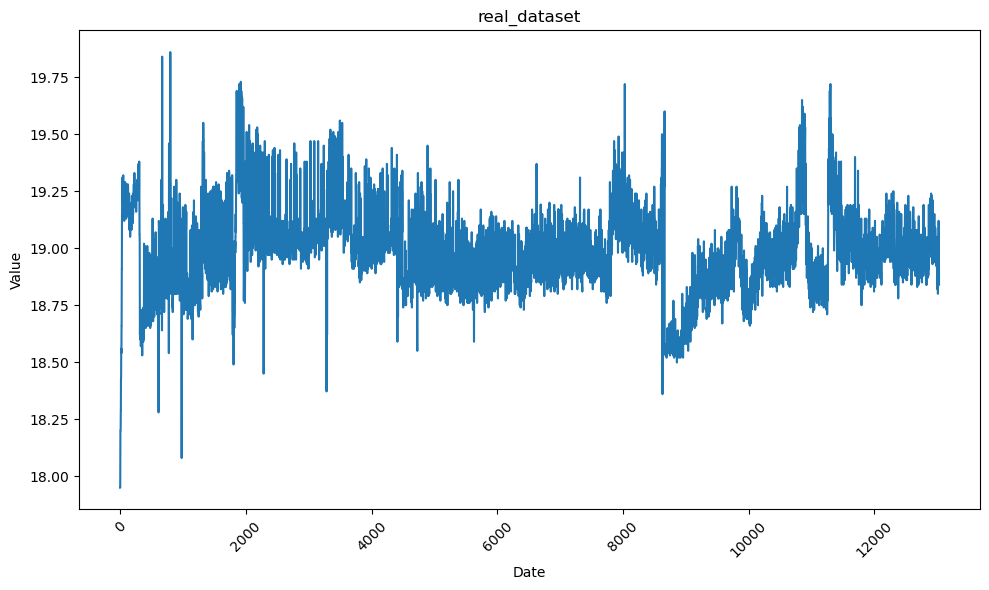

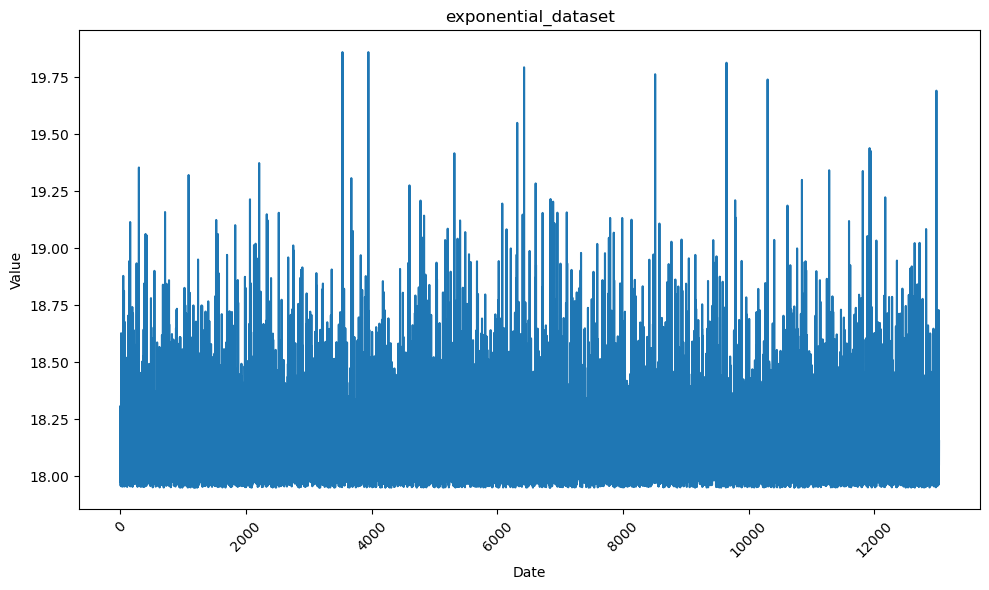

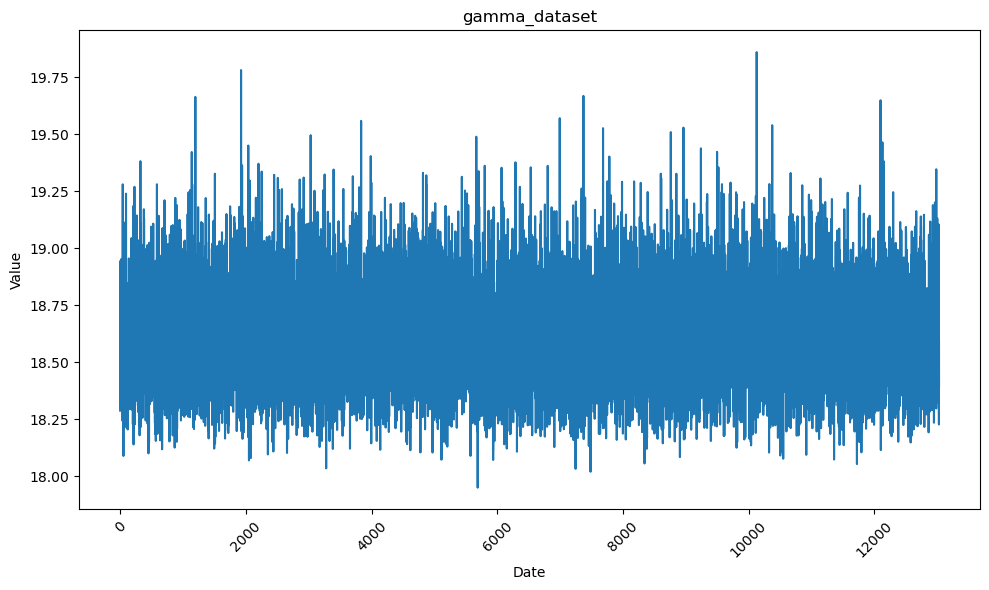

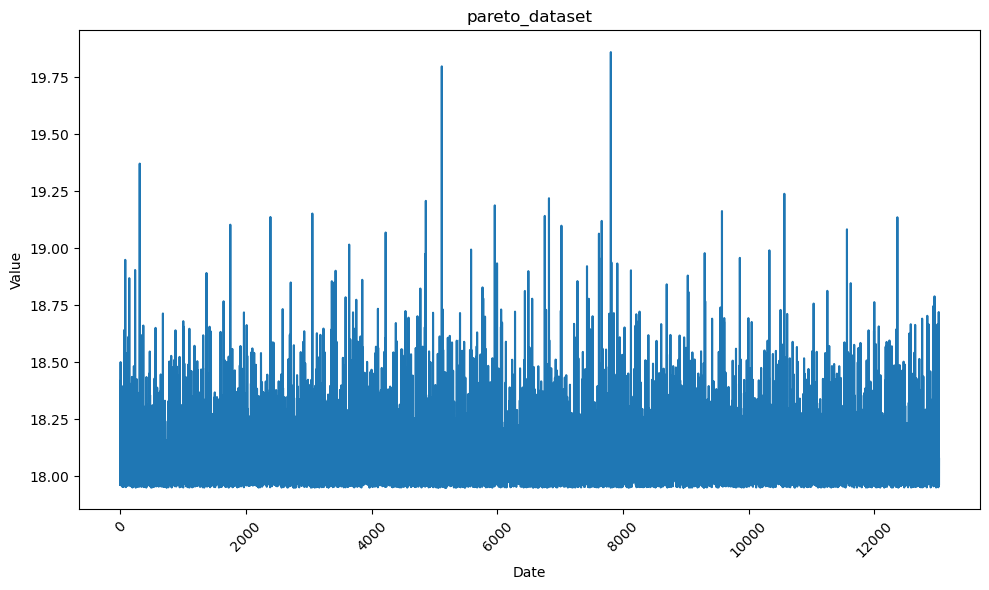

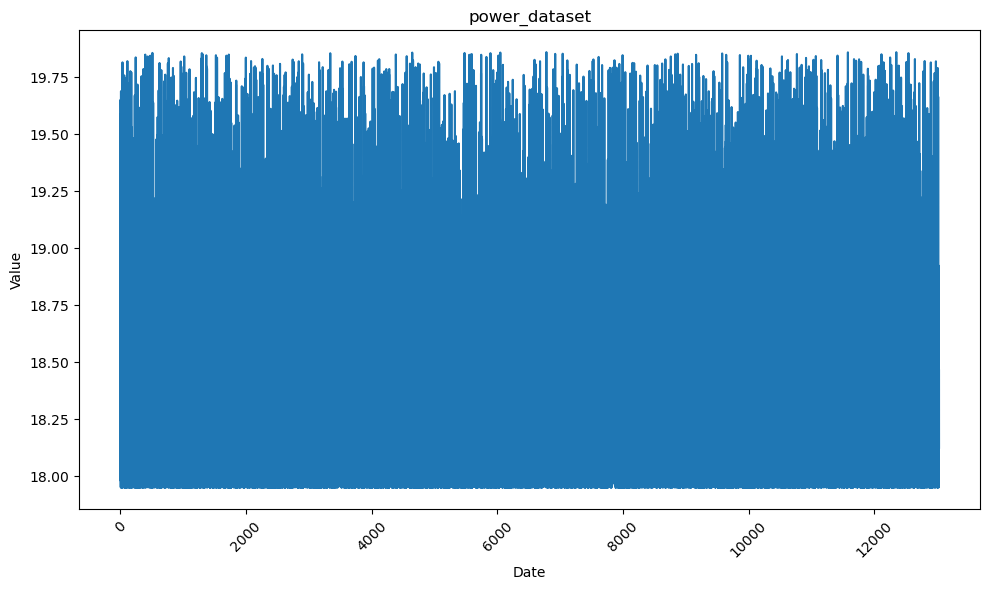

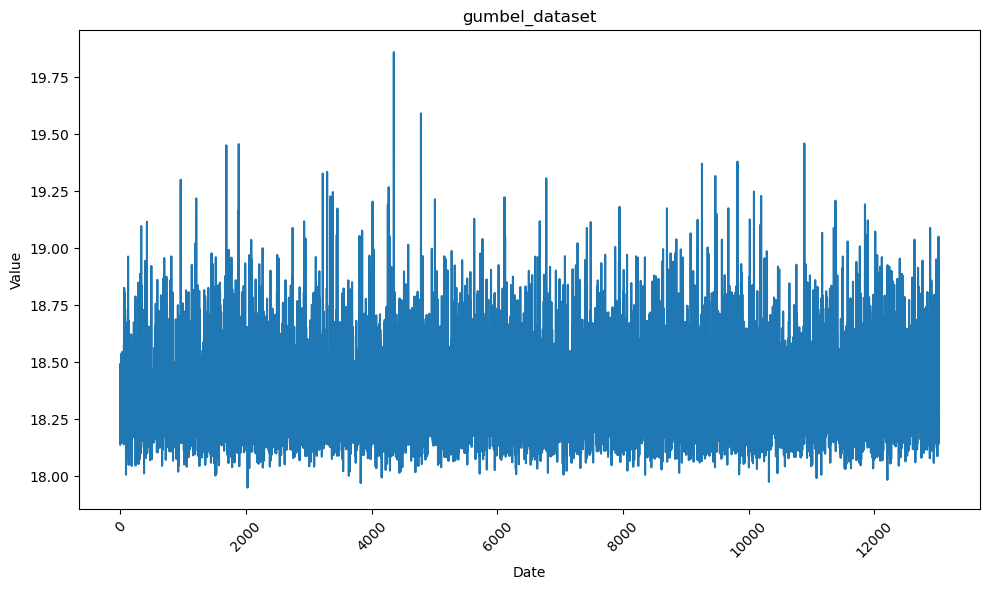

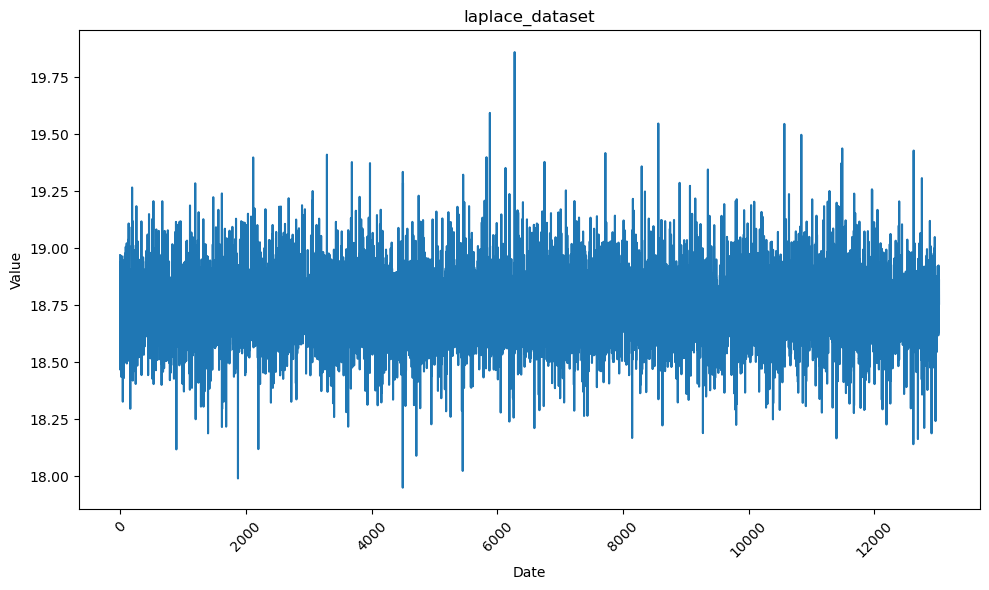

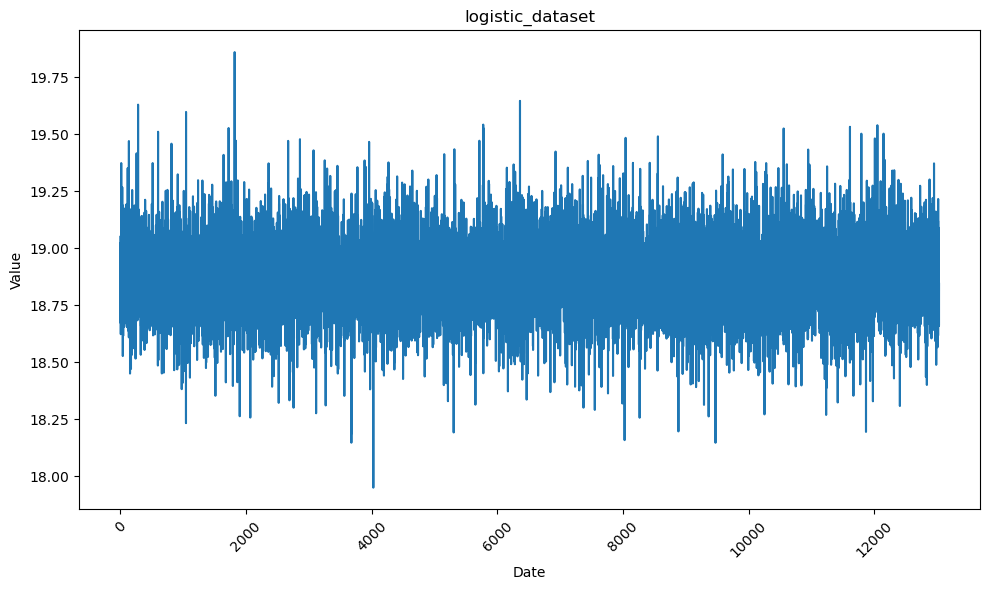

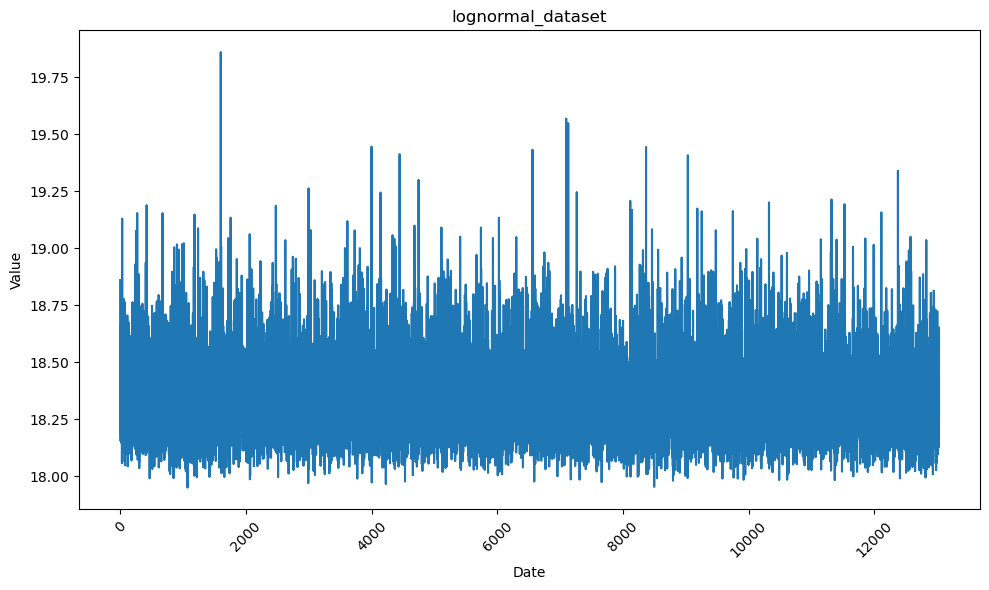

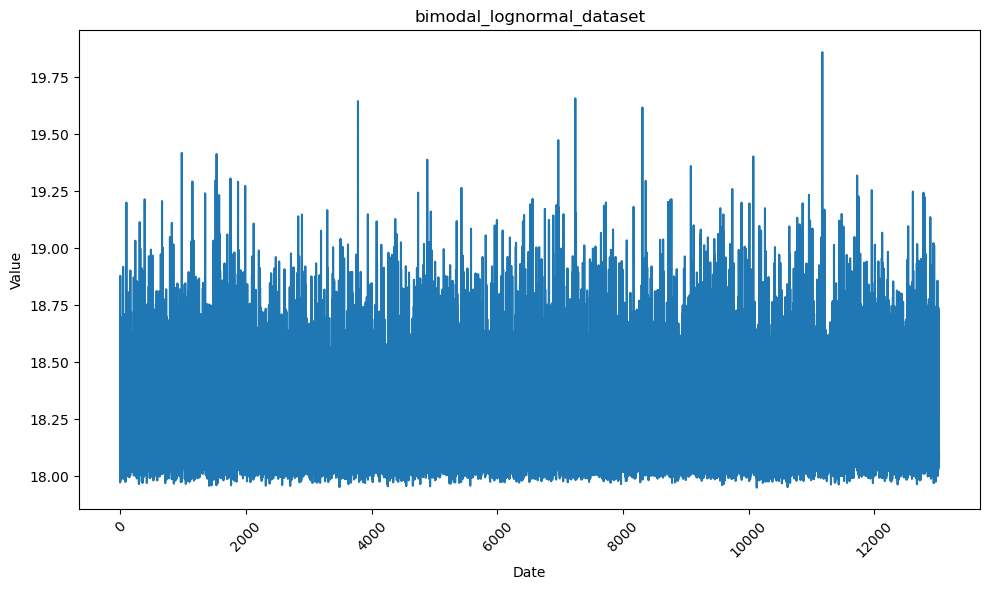

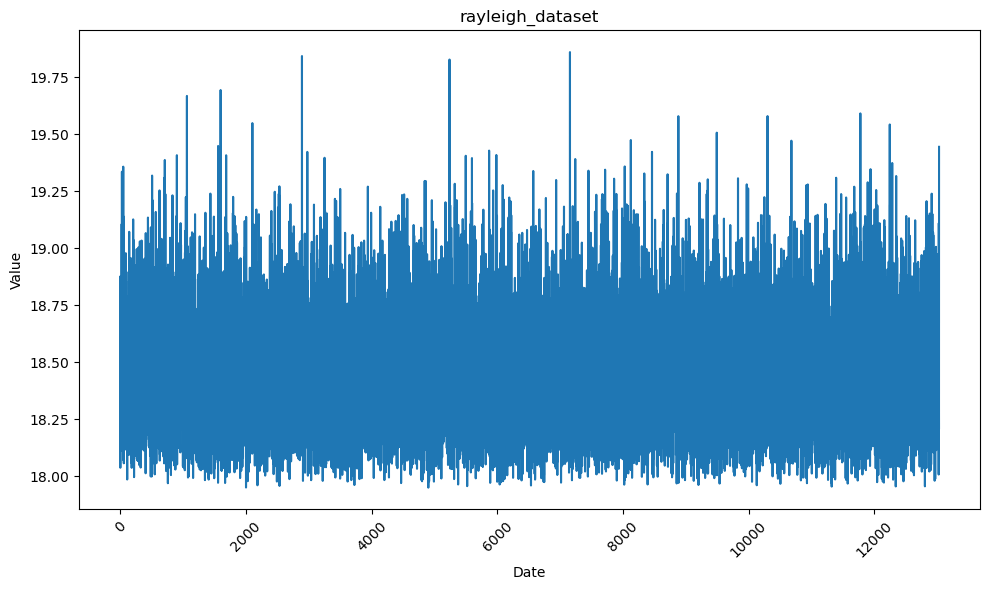

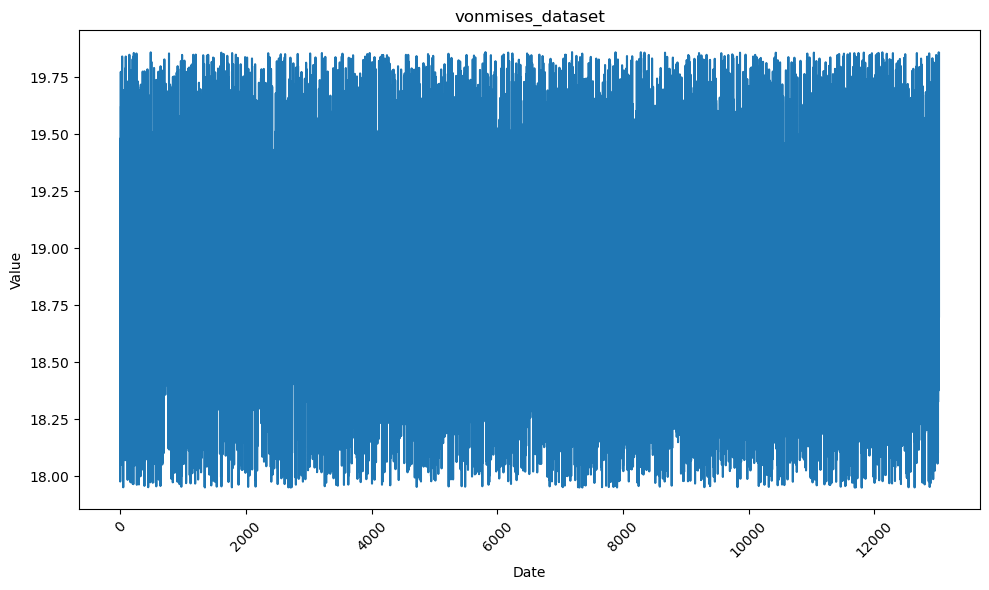

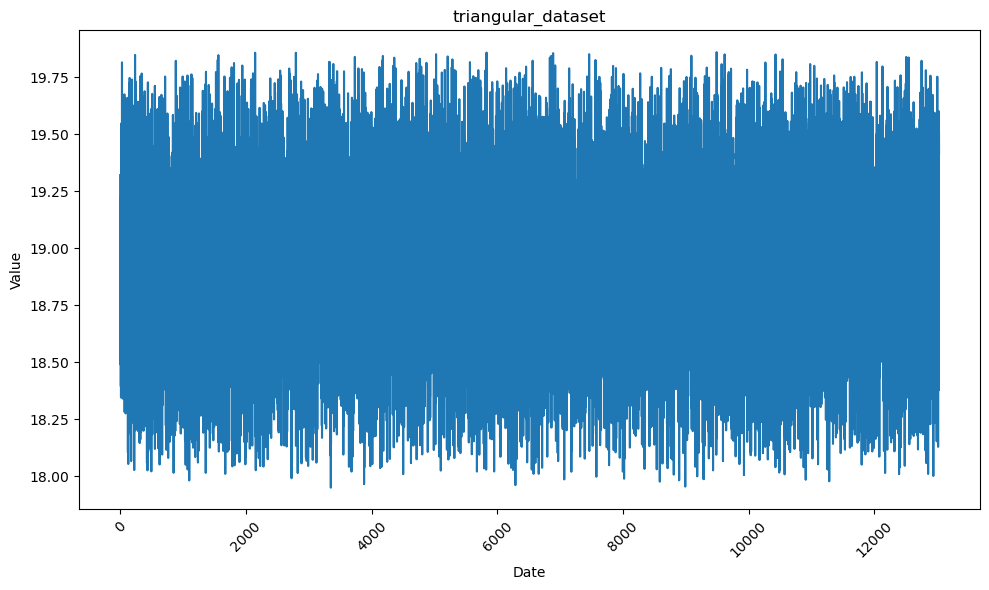

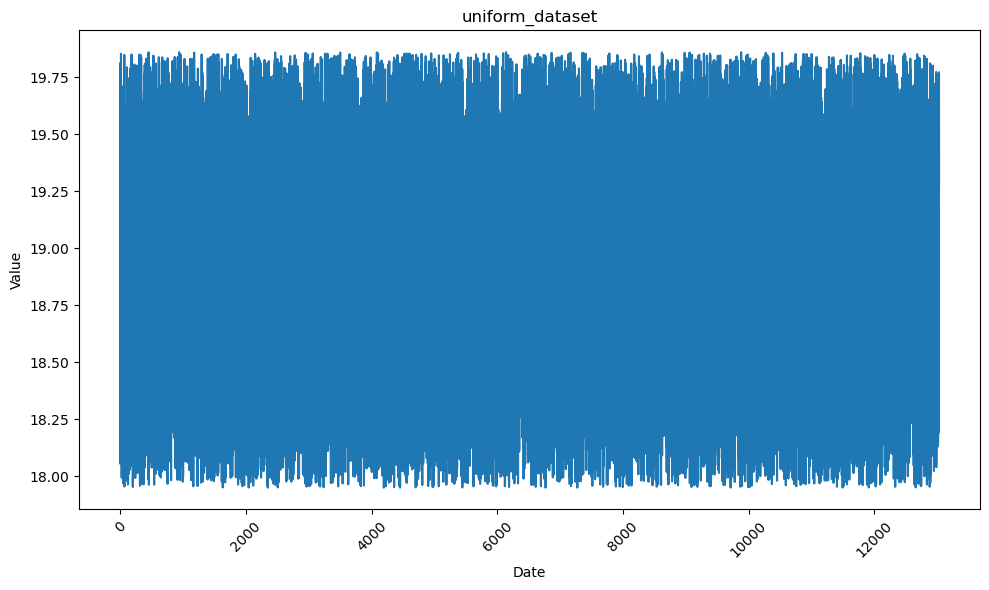

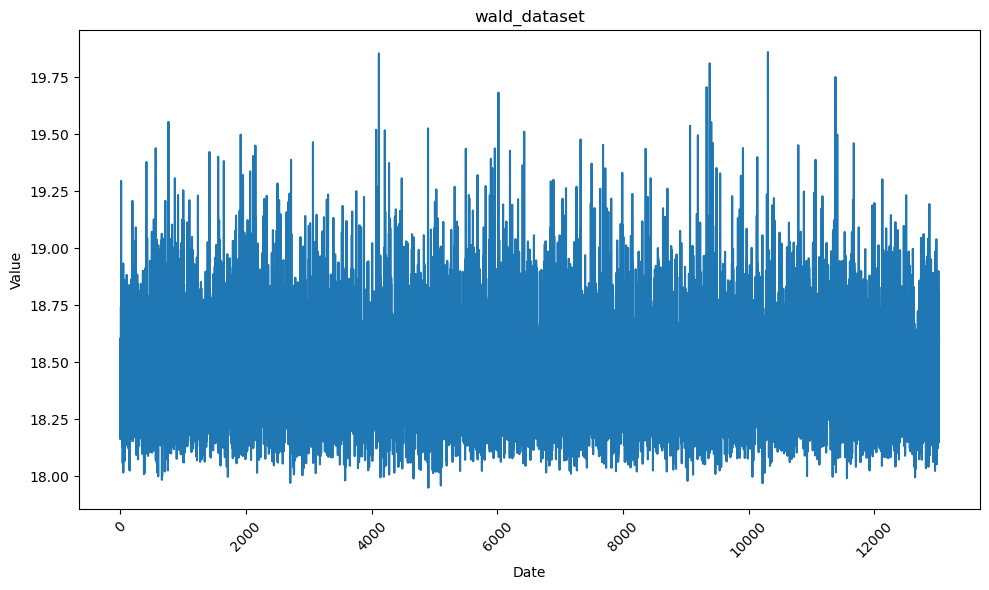

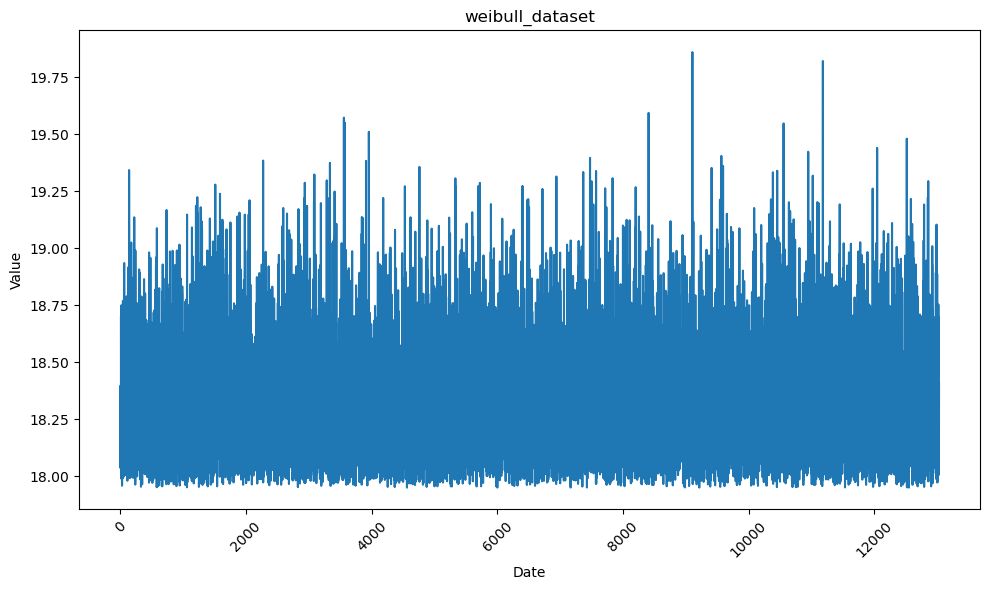

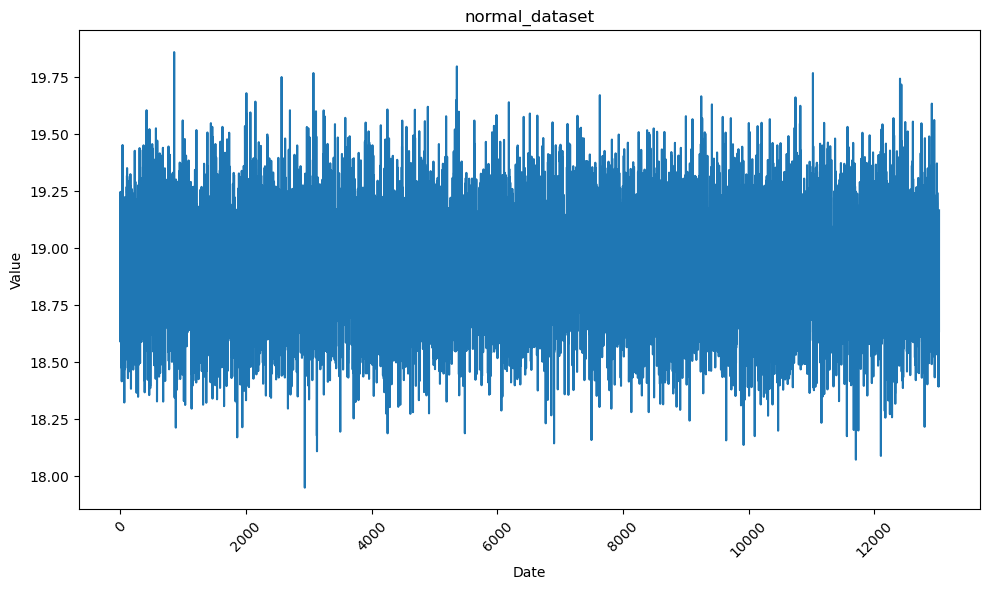

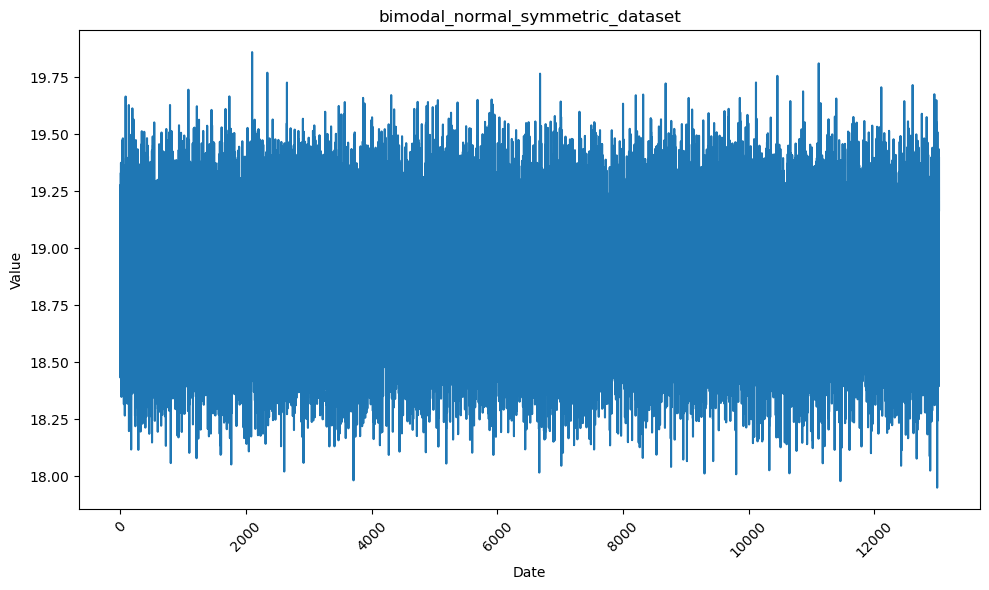

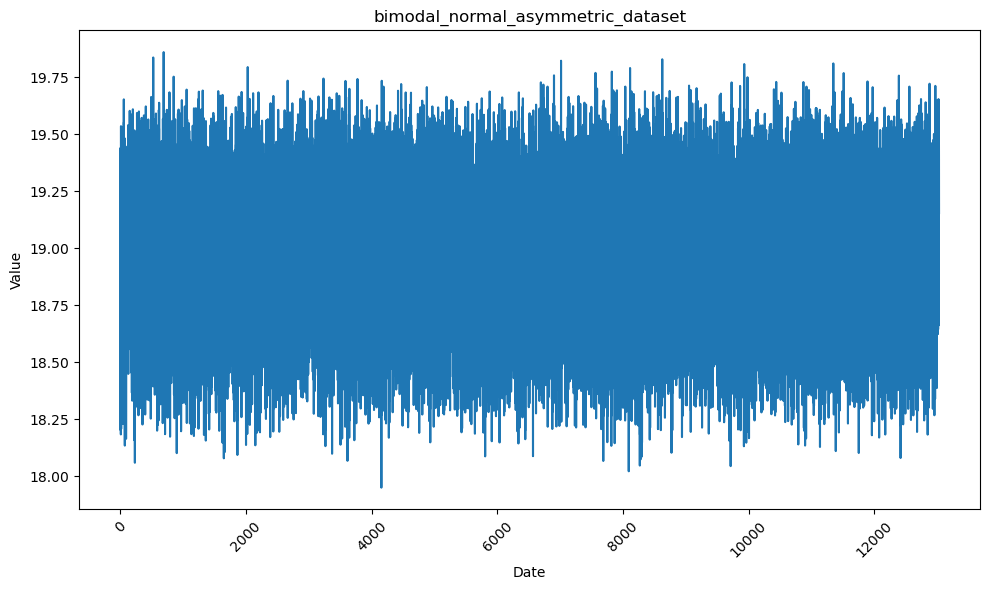

In [90]:
for col in datasets_names:
    plot_time_series(col)

In [138]:
real_timeseries = dataframe.iloc[:,:2]
real_timeseries

,time_stamp,real_dataset
0,0,17.95
1,1,17.95
2,2,17.95
3,3,18.09
4,4,18.09
...,...,...
13023,13023,18.95
13024,13024,18.95
13025,13025,18.95
13026,13026,18.84


In [101]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

In [103]:
shift1 = real_timeseries.autocorr(lag = 1)
print(shift1)

0.006946514653321505


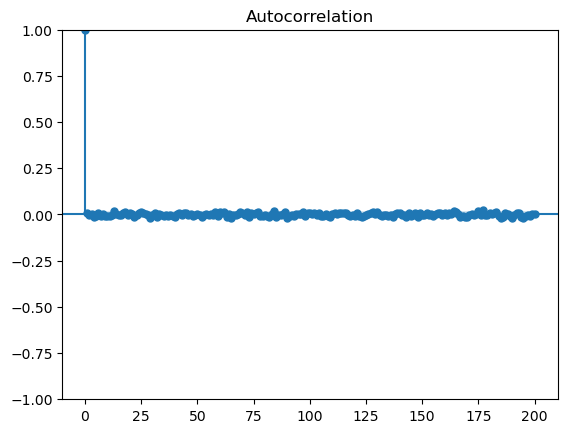

In [106]:
plot_acf(real_timeseries,lags = 200)
plt.show()

In [141]:
dataframe.iloc[:,1]


0        17.95
1        17.95
2        17.95
3        18.09
4        18.09
         ...  
13023    18.95
13024    18.95
13025    18.95
13026    18.84
13027    18.84
Name: real_dataset, Length: 13028, dtype: float64

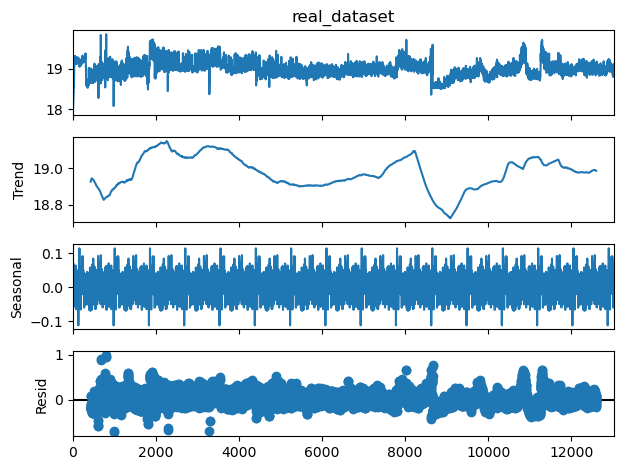

In [24]:
result = seasonal_decompose(dataframe.iloc[:,1], model='additive',period=850) # Adjust 'period' based on your data's seasonality
result.plot()
plt.show()

In [93]:
times_series_decomposition


,trend,seasonal,resid
0,NaN,0.027700,NaN
1,NaN,0.029834,NaN
2,NaN,0.023395,NaN
3,NaN,0.009095,NaN
4,NaN,0.016224,NaN
...,...,...,...
13023,NaN,-0.017654,NaN
13024,NaN,-0.027666,NaN
13025,NaN,0.011597,NaN
13026,NaN,0.018712,NaN


In [91]:
times_series_decomposition = pd.DataFrame(result.resid)
times_series_decomposition.insert(0, "seasonal",result.seasonal)
times_series_decomposition.insert(0, "trend",result.trend)
times_series_decomposition
times_series_decomposition.to_csv("times_series_decomposition")

In [30]:
dataframe.columns = datasets_names
dataframe.insert(0,"time_stamp", time_array)
dataframe.head(6)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13023   NaN
13024   NaN
13025   NaN
13026   NaN
13027   NaN
Name: resid, Length: 13028, dtype: float64

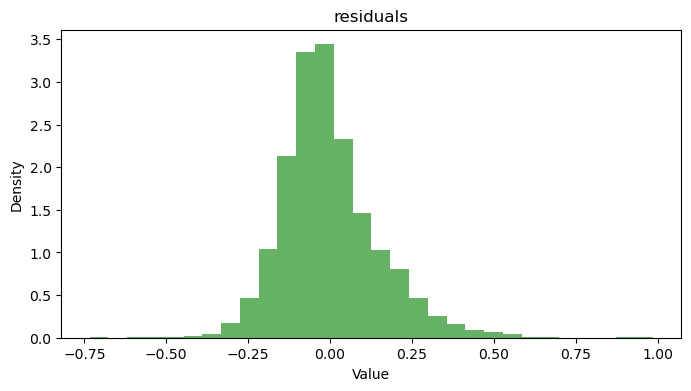

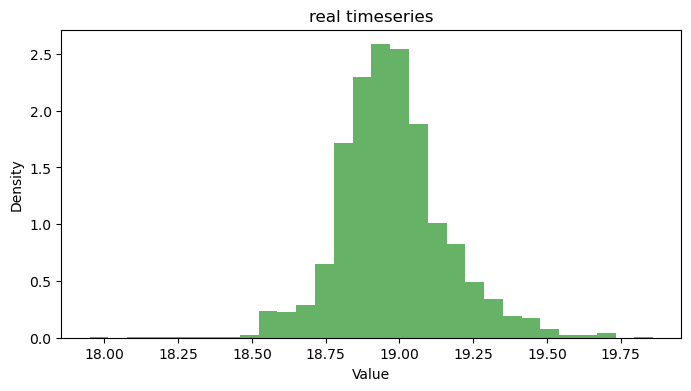

In [238]:
plot_data(result.resid,"residuals")
plot_data(dataframe.iloc[:,1],"real timeseries")

In [22]:
def get_msr(result):
    return sum((result.resid.dropna())**2)

In [23]:
periods = [10*(x+1) for x in range(600)]
msrs = []

In [222]:
for i in periods:
     result = seasonal_decompose(dataframe.iloc[:,1], model='multiplicative',period=i)
     msrs.append(get_msr(result))



In [223]:
msrs = np.array(msrs)

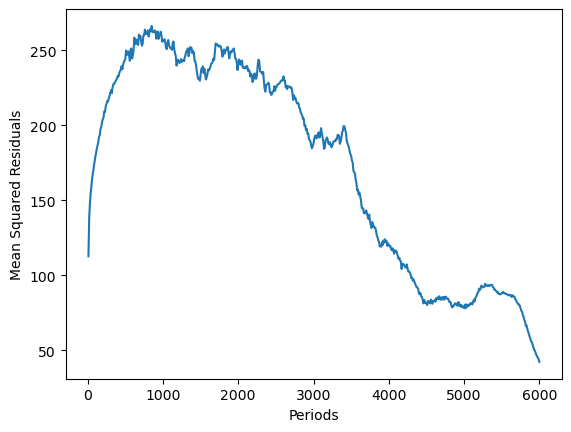

In [233]:

plt.plot(periods,msrs_additive)
plt.xlabel("Periods")
plt.ylabel("Mean Squared Residuals")
plt.show()

In [199]:
periods[np.argmax(msrs)] #the maximum seems to be around 850. we seatch again between 800 and 900

850

In [204]:
periods2 = [800+i for i in range(101)]
msrs2 = []

In [206]:
for i in periods2:
     result = seasonal_decompose(dataframe.iloc[:,1], model='additive',period=i)
     msrs2.append(get_msr(result))



In [215]:
msrs2 = np.array(msrs2)
periods2[np.argmax(msrs2)] #850 seems to be the global maximum

850